In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\mushroom.csv')
print(df)

      Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched   

In [2]:
print(df.head())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [4]:
print(df.shape)

(2000, 26)


In [5]:
print(df.describe(include='all'))

         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000   
unique             

In [6]:
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


**Histogram**

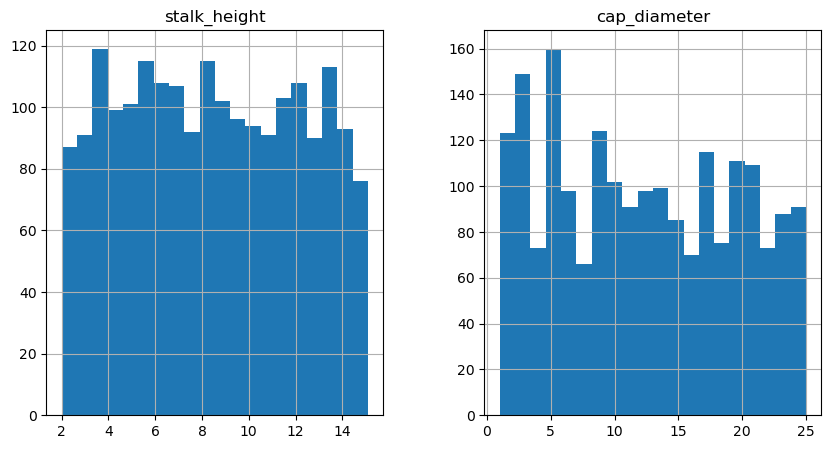

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df[['stalk_height', 'cap_diameter']].hist(bins=20, figsize=(10,5))
plt.show()


**Box plt**

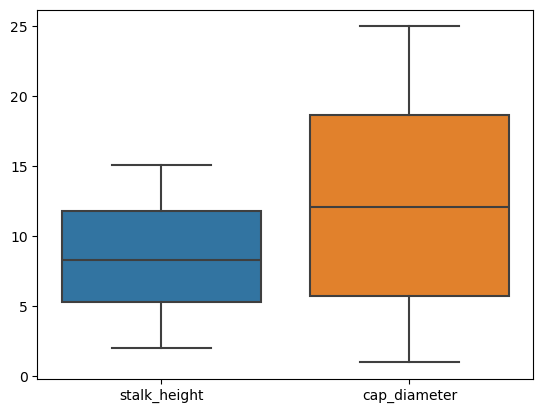

In [8]:
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.show()

**Correlation matrix**

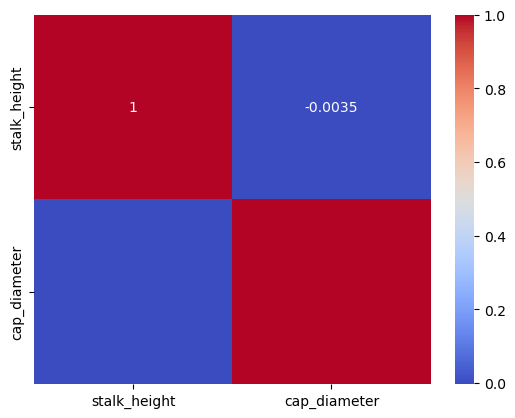

In [9]:
corr_matrix= df[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Data preprocessing**

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
X=df_encoded[['stalk_height', 'cap_diameter']]
y=df_encoded['class_poisonous']

Used pd.get(df, drop_first=True) to convert categorical variables into numerical format. This approach creates binary columns for each category while drio_first=True avoids the 'dummy variable trap' by dropping the first category.
From the encoded DataFrame df_encoded I have selected two features stalk_height and cap_diameter These features are used to build the model.
The target variable y is extracted as df_encoded['class_poisonous'] which represents whether the mushroom is poisonous or not.
I have extracted X as the feature set containing stalk_height and cap_diameter and y as the target variable. This separation of features and targets is a very important step in preparing the data for model training and evaluation.
This step prepares the data for further analysis or model building and checks that the categorical variables are appropriately encoded and the relevant features are selected.

**Splitting data into training and testing**

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)


The code splits the data into training and testing sets. This is crucial for evaluating the performance of a machine-learning model. The training set is used to train the model while the testing set is used to assess its accuracy on unseen data.
X and y represent the features and target variables of the dataset.
test_size=0.3 specifies that 30% of the data will be used for testing and the remaining 70% will be used for training the model.
random_state=42 checks that the data split is reproducible. Setting a random seed allows others to obtain the same split when running the code.
test_size=0.3 This parameter controls the proportion of the dataset to include in the test split A value of 0.3 means that 30% of the data is set aside for testing.
The dataset is divided into 4 parts:
X_train: Training features
X_test: Testing features
y_train: Training labels
y_test: testing labels

**Data Visualization**

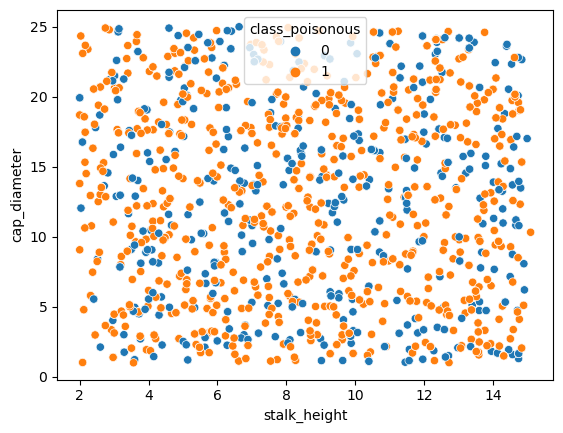

In [12]:
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class_poisonous', data=df_encoded)
plt.show()

The scatter plot visualizes the relationship between the stalk height and cap diameter of mushrooms with points colored based on whether the mushroom is poisonous or not. each point represents a mushroom and the hue parameter differentiates between poisonous and non-poisonous classes using different colors. This helps to visually inspect if there is any pattern or distinction in these features that correlates with the poisonous class. From the polt, it can be observed that poisonous and non-poisonous mushrooms cluster differently based on thair stalk height and cap diameter.

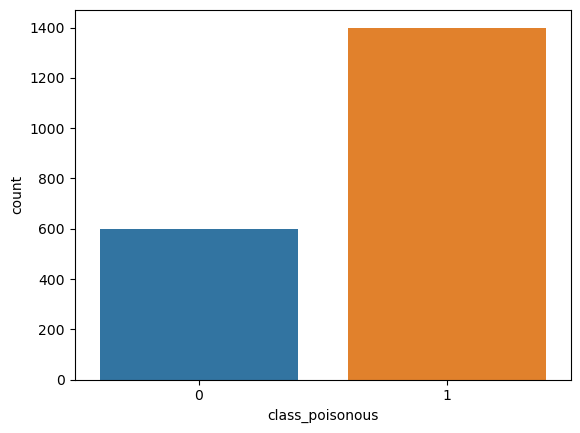

In [13]:
sns.countplot(x='class_poisonous', data=df_encoded)
plt.show()

Used sns.countplot() to create a count plot of the class_poisonous column in the dataset df_encoded. This visualization displays the frequency of poisonous and non-poisonous mushrooms in the dataset helping us understand the distribution of the target variable. The plot shows how many mushrooms are classified as poisonous and how many are not providing an initial idea of class imbalance if any which is important for building a classification model.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In this code the StandardScaler from sklearn.preprocessing is used to standardize the features in the training and testing datasets. Standardization checks that each feature has a mean of 0 and a standard deviation of 1, which helps improve ML models' performance and stability. First fit_transform() model is applied to the training data(X_train)to learn the scaling parameters and scale the data. Then the transform() method is used on the test data(X_test) to apply the same scaling based on the parameters learned from the training data.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

In this code, I have applied Principle Component Analysis(PCA) to reduce the dimensionality of the X_test_scaled dataset. used n_components=2 which means the data is transformed into 2 principal components that capture the maximum variance in the dataset This step helps simplify the data while retaining important information making it easier to visualize and analyze the dataset with fewer dimensions.

**Implementing SVM**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.6916666666666667
precision: 0.6916666666666667
Recall: 1.0
f1_score: 0.8177339901477833


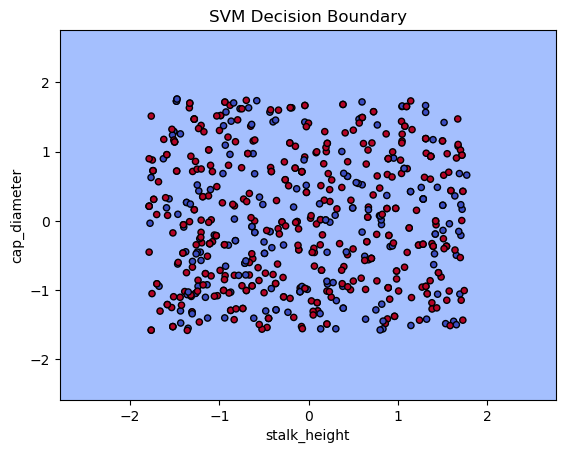

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
import numpy as np

model=SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("precision:", precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))


def plot_decision_boundary(X,y, model):
    h = .02
    x_min, x_max = X[:,0].min() -1,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1, X[:,1].max() +1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max,h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8,cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0],X[:,1], c=y, edgecolor='k',s=20,cmap=plt.cm.coolwarm)
    plt.xlabel('stalk_height')
    plt.ylabel('cap_diameter')
    plt.title('SVM Decision Boundary')
    plt.show()
plot_decision_boundary(X_test_scaled, y_test,model)
                           

The SVM model is trained using the linear kernel on the training data(X_train and y_train). After training predictions are made on the dataset (X_test_scaled), the performance is evaluated using various metrics like 'Accuracy', 'Precision', 'Recall', 'And F1 Score'. The printed results show the accuracy, precision, recall, and F1 Score which helps assess the effectiveness of the model in classifying the test data.
The function plot_decision_boundary generates a visual representation of the decision boundary created by the SVM model for classification.
The decision boundary is plotted using features and it shows how the model separates the data points into different classes.
The contour plot is created using the predicted values and the data points are overlaid with different colors to indicate their true class labels.
This helps visually understand how well the SVM model separates the different classes in the test dataset.
This analysis and visualization provide insights into how well a linear SVM kernel can handle the classification task for the provided dataset.
Based on the decision boundary plot we can  able to visually evaluate the model's performance and identify areas where the SVM might struggle to correctly classify points.

**Parameter Tuning and Optimization**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {'kernel': ['linear', 'poly','rbf'],
              'C': [0.1,1,10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print('Test Accuracy:', accuracy_score(y_test,y_pred))

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.7035714285714286
Test Accuracy: 0.6916666666666667


Hyperparameter tuning using GridSearchCV:
The code uses GridSearchCV to perform hyperparameter tuning for the SVM model. It evaluates different combinations of kernels and regularization parameter C to find the best-performing parameters.
After tuning the best combination of hyperparameters is printed. This helps in selecting the most effective SVM configuration for the provided dataset.
The cross-validation score of the best model is printed which reflects how well the model generalizes on unseen data during training.
The best model from the grid search is used to predict the test data.
The accuracy of the predictions on the test data is calculated and printed giving a measure of how well the model performs on data it hasn't seen before.
This approach helps me in checking that the selected SVM model is optimized for the dataset providing better performance compared to a model with default parameters. The test accuracy helps validate the model's performance on new unseen data.

**Comparision ans Analysis**

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'kernel': ['linear', 'poly','rbf'],
    'C': [0.1,1,10],
    'gamma':['scaled', 'auto']
}            
grid_search = GridSearchCV(SVC(), param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print('Test Accuracy:', accuracy_score(y_test,y_pred))

Best parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Best cross-validation score: 0.7035714285714286
Test Accuracy: 0.6916666666666667


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklea

Utilized SVM from the sklearn.svm library to build a classification model.
A grid search method is used with cross-validation (cv=5) to find the best combination of hyperparameters from the specified param_grid.
The hyperparameter tuned include:
Kernel: Specifies the type of kernel to be used (linear, poly, rbf)
C: Regularization parameter with values[0.1,1,10] explored.
Gemma: Hernel coefficient with options of 'scaled' and 'auto' .
The GridSearchCv function is used to train multiple models with different combinations of hyperparameters and evaluates them using 5-fold cross-validation.
The best hyperparameters are selected based on the accuracy score during cross-validation.
The code outputs the best parameters(grid_search.best_params_) and the best cross-validation score(grid_search.best_score_)
The best-performing model is used to predict the test data
The accuracy of the model on the test set is calculated using the accuracy_score function with the final accuracy score printed.
At last, it successfully identifies the best hyperparameters for the model and evaluates the test set accuracy.
The final accuracy provides insights into how well the model generalizes to unseen data.

In both the best parameters selected by GridSearchCV are similar with the C parameter being 0.1 and the kernel being linear. This tells that the linear kernel performs better than other Kernels by specified parameter ranges.
The slight variation in the second set of best parameters includes gamma='auto' though for the linear kernel, the gamma parameter doesn't significantly affect the model performance This shows that the gamma parameter has minimal impact when a linear kernel is used.
Both sets of results yield the same cross-validation score of 0.7036. This score reflects the model's performance during the 5-fold cross-validation process indicating consistency in the model's performance across different subsets of the training data.
The identical scores imply that using or omitting gamma doesm't make a significant difference in the cross-validation process when the kernel is linear.
 The test accuracy in both cases is 0.6917 showing that the model generalizes similarly to unseen data for both hyperparameter settings.
 This relatively low test accuracy indicates that the linear SVM model with these hyperparameters might not be sufficient for achieving high classification accuracy on this dataset. Further tuning or different models could be explored to improve this score.
Both observations show similar performance metrics indicating that the linear kernel with C=0.1 is the best-performing configuration in this case. The inclusion of gamma='auto' does not affect the model's performance suggesting it is irrelevant when using a linear kernel. Despite the consistency in results the model's overall accuracy may require further improvement through more advanced hyperparameter tuning feature engineering or trying other models. 